<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/AnberW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
print("--- Step 1: Creating Synthetic Text Data ---")
# Since xAPI dataset has no text, we simulate "Teacher Comments"
data = {
    'text': [
        "Student is very attentive and submits homework on time.",
        "Struggling with basic concepts, needs extra help.",
        "Excellent performance in quizzes and active in discussion.",
        "Misses classes often and does not reply to emails.",
        "Great leadership skills in group projects.",
        "Scores are declining, parents contacted.",
        "Very quiet but submits good work.",
        "Disruptive behavior in class, failing grades.",
        "Always asks insightful questions.",
        "Has not submitted the last two assignments.",
        "Showed great improvement in the final exam.",
        "Lacks motivation and sleeps in class.",
        "Consistent high performer.",
        "Having trouble understanding the syntax.",
        "Participates frequently and helps others.",
        "Absent for a week due to illness, catching up slowly."
    ],
    'label': [
        'High', 'Low', 'High', 'Low', 'High', 'Low', 'Medium', 'Low',
        'High', 'Low', 'High', 'Low', 'High', 'Medium', 'High', 'Medium'
    ]
}

df_nlp = pd.DataFrame(data)
print(f"Created Synthetic Dataset with {len(df_nlp)} teacher comments.")
print(df_nlp.head())

--- Step 1: Creating Synthetic Text Data ---
Created Synthetic Dataset with 16 teacher comments.
                                                text label
0  Student is very attentive and submits homework...  High
1  Struggling with basic concepts, needs extra help.   Low
2  Excellent performance in quizzes and active in...  High
3  Misses classes often and does not reply to ema...   Low
4         Great leadership skills in group projects.  High


In [3]:
print("\n--- Step 2: Text Preprocessing & Vectorization ---")

# We use a Pipeline:
# 1. CountVectorizer: Converts words to counts ("bag of words")
# 2. TfidfTransformer: Weighs unique words (like 'struggling') higher than common words (like 'the')
# 3. MultinomialNB: Naive Bayes classifier (Standard for text)

text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')), # Remove "is", "the", "and"
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Split
X = df_nlp['text']
y = df_nlp['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Pipeline Created. Training Model...")

# Train
text_clf.fit(X_train, y_train)
print("Training Complete.")


--- Step 2: Text Preprocessing & Vectorization ---
Pipeline Created. Training Model...
Training Complete.



--- Step 3: Evaluation & Testing ---
Test Accuracy: 40.00%


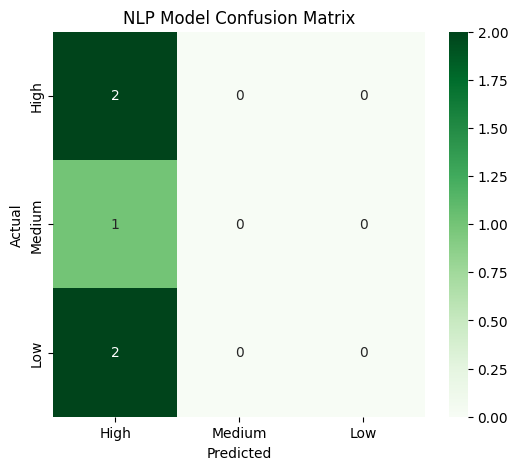

In [4]:
print("\n--- Step 3: Evaluation & Testing ---")

# Evaluate on Test Split
y_pred = text_clf.predict(X_test)
print(f"Test Accuracy: {np.mean(y_pred == y_test)*100:.2f}%")

# Confusion Matrix
labels = ['High', 'Medium', 'Low']
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.title('NLP Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
print("\n--- Step 4: Live Testing (Try your own input) ---")

# Test with new, unseen sentences
new_comments = [
    "He is failing all his tests.",
    "She is a brilliant student with perfect attendance.",
    "He tries hard but fails the exams."
]

predictions = text_clf.predict(new_comments)

for doc, category in zip(new_comments, predictions):
    print(f"Comment: '{doc}' => Predicted Performance: {category}")


--- Step 4: Live Testing (Try your own input) ---
Comment: 'He is failing all his tests.' => Predicted Performance: Low
Comment: 'She is a brilliant student with perfect attendance.' => Predicted Performance: High
Comment: 'He tries hard but fails the exams.' => Predicted Performance: High
